In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam



C:\Users\thano\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data augmentation and preparation

In [ ]:

data_dir = "C:/Users/thano/Downloads/archive/data"


data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Training data and Validation data

In [3]:

train_data = data_gen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


val_data = data_gen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 33600 images belonging to 35 classes.
Found 8400 images belonging to 35 classes.


# CNN Model

In [4]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])



C:\Users\thano\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train model

In [5]:

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_data, epochs=5, validation_data=val_data)



Epoch 1/5


C:\Users\thano\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 128s 120ms/step - accuracy: 0.1408 - loss: 3.0825 - val_accuracy: 0.8139 - val_loss: 0.9533
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 123s 117ms/step - accuracy: 0.6207 - loss: 1.2144 - val_accuracy: 0.9231 - val_loss: 0.3486
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 123s 117ms/step - accuracy: 0.8018 - loss: 0.6284 - val_accuracy: 0.9610 - val_loss: 0.1636
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 123s 117ms/step - accuracy: 0.8623 - loss: 0.4303 - val_accuracy: 0.9846 - val_loss: 0.0860
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 128s 121ms/step - accuracy: 0.8994 - loss: 0.3178 - val_accuracy: 0.9838 - val_loss: 0.0655


# Evaluate the model on validation data

In [6]:
import matplotlib.pyplot as plt


val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")



263/263 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.9814 - loss: 0.0744
Validation Accuracy: 98.25%
Validation Loss: 0.0723


In [15]:

model.save(r'C:/Users/thano/Downloads/data science/interm/project 3/newsign_language_model.h5')


In [1]:
from keras.models import load_model
model = load_model('C:/Users/thano/Downloads/data science/interm/project 3/newsign_language_model.h5')

C:\Users\thano\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# testing the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


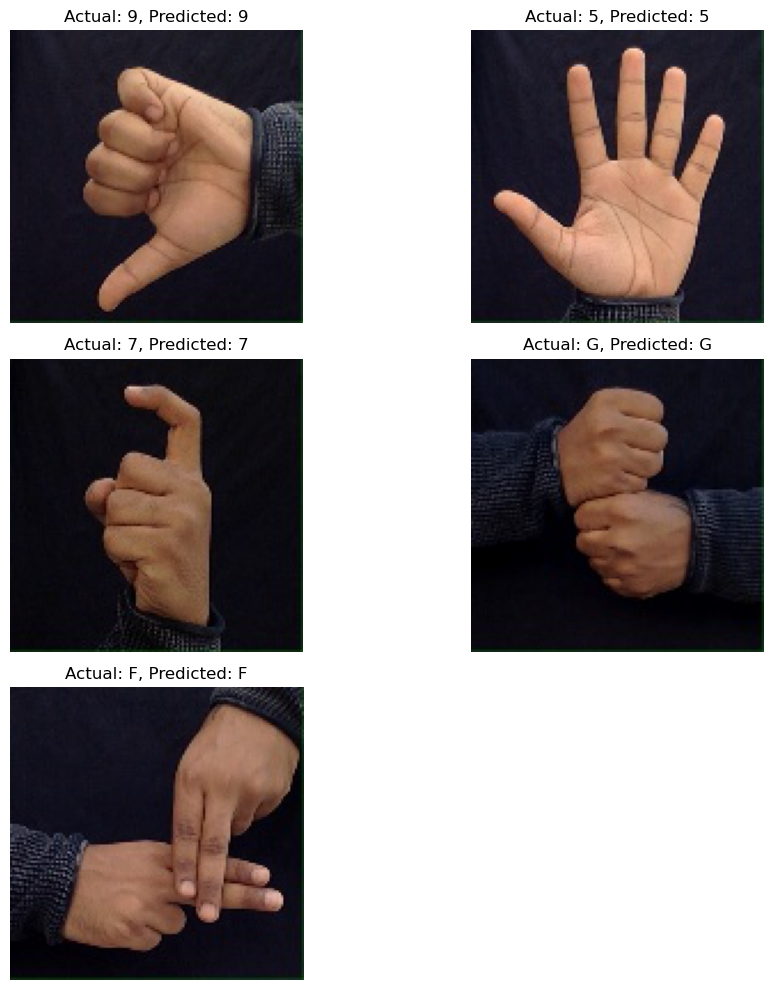

In [4]:
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

data_path = r"C:\Users\thano\Downloads\archive\data"


class_names = os.listdir(data_path)


def preprocess_image(image_path):
    img = load_img(image_path, target_size=(64, 64))
    img_array = img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  
    img_array = img_array / 255.0  
    return img_array


sample_images = []
sample_labels = []
for class_name in random.sample(class_names, 5):
    class_path = os.path.join(data_path, class_name)
    image_name = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_name)
    sample_images.append(image_path)
    sample_labels.append(class_name)

plt.figure(figsize=(10, 10))
for i, image_path in enumerate(sample_images):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = class_names[tf.argmax(prediction[0])]
    

    plt.subplot(3, 2, i + 1)
    plt.imshow(load_img(image_path))
    plt.title(f"Actual: {sample_labels[i]}, Predicted: {predicted_class}")
    plt.axis("off")

plt.tight_layout()
plt.show()


# giu

In [2]:
import tkinter as tk
from tkinter import filedialog, Label
from keras.models import load_model
from PIL import Image, ImageTk
import numpy as np
import cv2

# image detection

In [3]:

def upload_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        process_image(file_path)
        
def process_image(file_path):
    image = Image.open(file_path).convert('RGB')
    image = image.resize((64, 64))
    image_array = np.array(image) / 255.0  

    image_array = np.expand_dims(image_array, axis=0)


    prediction = model.predict(image_array)
    predicted_index = np.argmax(prediction, axis=1)[0]
    predicted_class_name = class_names[predicted_index] 
    
    result_label.config(text=f"Predicted Sign: {predicted_class_name}")

  
    img = ImageTk.PhotoImage(image.resize((200, 200)))
    image_label.config(image=img)
    image_label.image = img





# real time video 
## press q to quit

In [10]:
box_start_x = 200  
box_start_y = 150  
box_width = 200    
box_height = 200  


def start_video():
    cap = cv2.VideoCapture(0)
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        cv2.rectangle(frame, (box_start_x, box_start_y), 
                      (box_start_x + box_width, box_start_y + box_height), 
                      (255, 0, 0), 2) 


        roi = frame[box_start_y:box_start_y + box_height, box_start_x:box_start_x + box_width]
        img = cv2.resize(roi, (64, 64))  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        img_array = np.expand_dims(np.array(img) / 255.0, axis=0) 
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)
        cv2.putText(frame, f"Predicted Sign: {predicted_class[0]}", (10, 50), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1)
        cv2.imshow('Real-Time Sign Language Detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows() 

# giu interface

In [11]:

root = tk.Tk()
root.title("Sign Language Detection")
root.geometry("800x600")
root.config(bg='lightblue') 


upload_button = tk.Button(root, text="Upload Image", command=upload_image, width=30, height=5,bg='lightpink',fg='black')
upload_button.pack(pady=20)

video_button = tk.Button(root, text="Start Video Detection", command=start_video, width=30, height=5,bg='lightpink',fg='black')
video_button.pack(pady=20)

result_label = Label(root, text="Predicted Sign: None", font=("Helvetica", 16))
result_label.pack(pady=20)

image_label = Label(root)
image_label.pack(pady=10)



root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━